# Network classifier notebook
For implementing new ideas!

In [2]:
import numpy as np

# Basic script to run network state classfication

from loadSeizureData  import LoadSeizureData
from classifierTester import ClassifierTester
from basicFeatures    import BasicFeatures
from randomForestClassifier import RandomForest
from freqfeatures     import FreqFeatures

dirpath = '/Users/Jonathan/Documents/PhD /Seizure_related/Network_states/VMData/Classified'


dataobj = LoadSeizureData(dirpath)
dataobj.load_data()

basicStatsExtractor = BasicFeatures()
#freqextractor = FreqFeatures()
dataobj.extract_feature_array([basicStatsExtractor])
#dataobj.extract_feature_array([freqextractor])

rf = RandomForest(no_trees = 100)
results = []
runs = 10
for i in range(runs):
    classtester = ClassifierTester(dataobj.features,np.ravel(dataobj.label_colarray), training_test_split = 80)
    (score, predictedlabelsprobs, reallabels) = classtester.test_classifier(rf)
    results.append(score)

print 'training a random forest classifier!'
print results
print np.mean(results), ' mean score'


here2
training a random forest classifier!
[93.442622950819683, 88.52459016393442, 68.852459016393439, 75.409836065573771, 86.885245901639337, 93.442622950819683, 85.245901639344254, 83.606557377049185, 67.213114754098356, 81.967213114754102]
82.4590163934  mean score


## Understanding the feature dataset
1. scatter plot matrix
2. pca projection
3. Correct labels!

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.style.use('ggplot')

#from pandas.tools.plotting import scatter_matrix
import pandas as pd
print dataobj.features.shape
#df = pd.DataFrame(dataobj.features, columns = ['kurtosis','skew','coastline'])
df = pd.DataFrame(dataobj.features, columns = ['kurtosis','skew','variation','coastline'])
#df = pd.DataFrame(dataobj.features)

(301, 4)


In [38]:
df.head()

,kurtosis,skew,variation,coastline
0,0.119577,0.306829,-0.074718,-0.008477
1,0.908896,0.606773,0.029568,0.462507
2,-0.723298,-0.199078,-0.140058,-0.639175
3,0.769335,-2.075999,-0.291485,-0.002041
4,0.123022,-0.664065,0.746927,-0.788351


In [39]:
import seaborn as sns

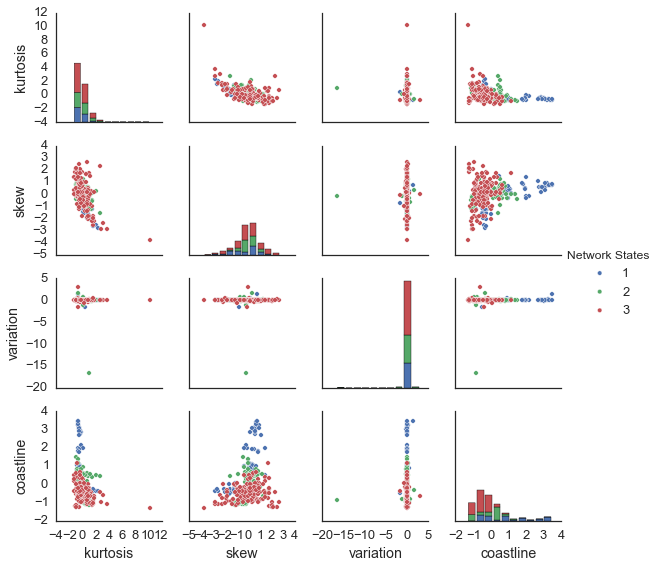

In [40]:
sns.set(style="white")
#sns.set()

#df = sns.load_dataset("iris")
#df = pd.DataFrame(dataobj.features, columns = ['kurtosis','skew','variation','coastline'])
#df = pd.DataFrame(dataobj.features)
df['Network States'] = dataobj.label_colarray
#print df.head()
#sns.pairplot(df, size=2.5)
sns.set_context("talk", font_scale=1.00)
g = sns.pairplot(df, vars=['kurtosis','skew','variation','coastline'], hue="Network States", size = 2)
#sns.despine(offset=10, trim=True);
#f = sns.pairplot(df, vars=['kurtosis','skew','variation','coastline'], hue="labels", palette="Set2", diag_kind="kde", size = 2.5)
#g.map(plt.scatter)

#g = sns.PairGrid(df, vars=['kurtosis','skew','variation','coastline'], hue="labels", size = 4)
#g.map(plt.scatter)
plt.savefig('scatter_matrix.png')

#Radviz

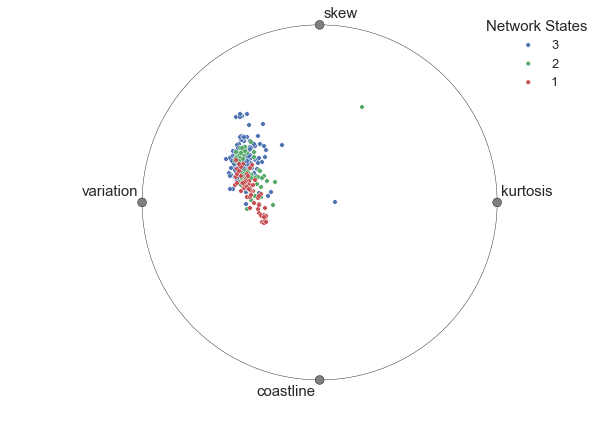

In [47]:
from pandas.tools.plotting import radviz
#df['labels'] = dataobj.label_colarray
cmap =  sns.color_palette()
#with plt.xkcd(scale = 0.1,randomness = 2.5 ):
plt.figure(figsize = (10,7))

ax = plt.subplot(111)

radviz(df,'Network States', ax = ax, color = cmap, edgecolor = 'white')
ax.legend(frameon = False)
ax.axis('off')
legend = ax.legend(title = 'Network States')
plt.setp(legend.get_title(),fontsize=15)

#ax.legend( loc='center left', bbox_to_anchor=(0, 1),fontsize='medium', fancybox=True, ncol=3 )
ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))#, emit=True, auto=False )
#ax.set_title( 'Radviz visualisation of feature matrix', loc='Center' )
for text in ax.texts:
    text.set_size(15)
    
plt.savefig('radviz.png')

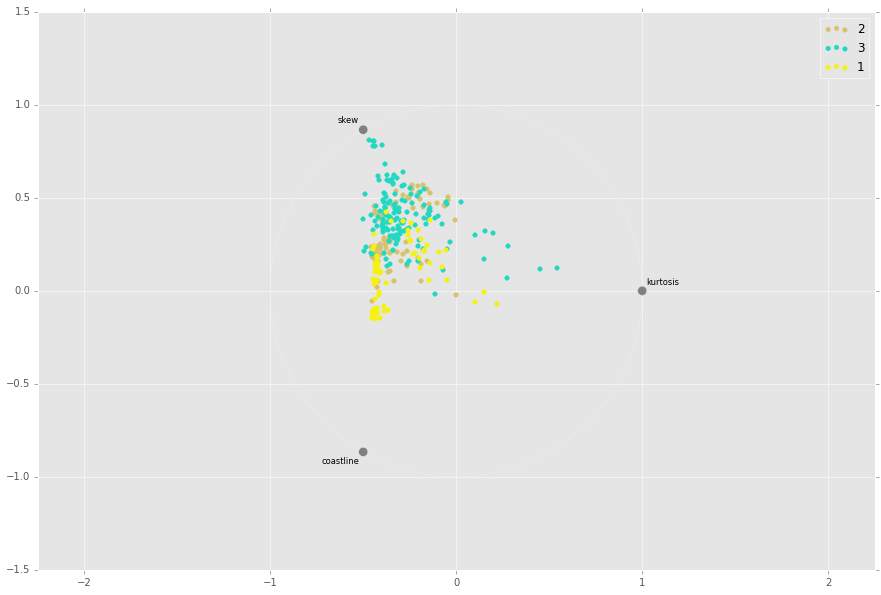

In [9]:
plt.figure(figsize = (15,10))
df['labels'] = dataobj.label_colarray
radviz(df,'labels')
#plt.savefig('radviz.png')

In [ ]:
np.fft.fft()

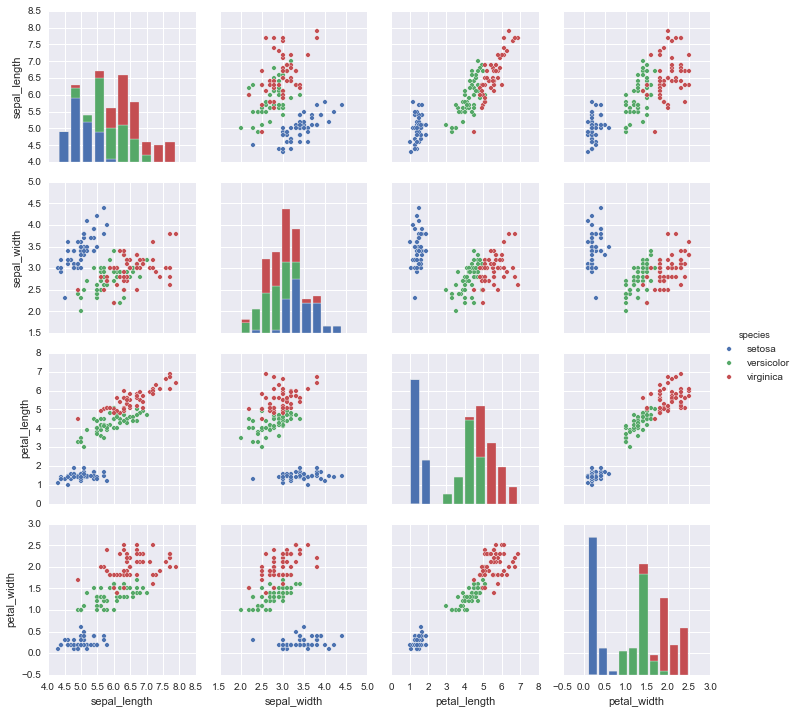

In [15]:
import seaborn as sns
sns.set()

df = sns.load_dataset("iris")

sns.pairplot(df, hue="species", size=2.5)

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
import networkx as nx
from numpy import random

G = nx.random_regular_graph(3,100)
mat = nx.adjacency_matrix(G).todense()
l = (random.rand(100)*5).astype('int')

lgn.force(mat, label=l)

NameError: name 'lgn' is not defined

In [15]:
import lightning

ImportError: No module named lightning

In [76]:
def radviz2(frame, class_column, ax=None, color=None, colormap=None, **kwds):
    """RadViz - a multivariate data visualization algorithm
    Parameters:
    -----------
    frame: DataFrame
    class_column: str
        Column name containing class names
    ax: Matplotlib axis object, optional
    color: list or tuple, optional
        Colors to use for the different classes
    colormap : str or matplotlib colormap object, default None
        Colormap to select colors from. If string, load colormap with that name
        from matplotlib.
    kwds: keywords
        Options to pass to matplotlib scatter plotting method
    Returns:
    --------
    ax: Matplotlib axis object
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    def normalize(series):
        a = min(series)
        b = max(series)
        return (series - a) / (b - a)

    n = len(frame)
    classes = frame[class_column].drop_duplicates()
    class_col = frame[class_column]
    df = frame.drop(class_column, axis=1).apply(normalize)

    if ax is None:
        ax = plt.gca(xlim=[-1, 1], ylim=[-1, 1])

    to_plot = {}
    colors = _get_standard_colors(num_colors=len(classes), colormap=colormap,
                                  color_type='random', color=color)

    for kls in classes:
        to_plot[kls] = [[], []]

    m = len(frame.columns) - 1
    s = np.array([(np.cos(t), np.sin(t))
                  for t in [2.0 * np.pi * (i / float(m))
                            for i in range(m)]])

    for i in range(n):
        row = df.iloc[i].values
        row_ = np.repeat(np.expand_dims(row, axis=1), 2, axis=1)
        y = (s * row_).sum(axis=0) / row.sum()
        kls = class_col.iat[i]
        to_plot[kls][0].append(y[0])
        to_plot[kls][1].append(y[1])

    for i, kls in enumerate(classes):
        ax.scatter(to_plot[kls][0], to_plot[kls][1], color=colors[i],
                   label=com.pprint_thing(kls), **kwds)
    ax.legend()

    ax.add_patch(patches.Circle((0.0, 0.0), radius=1.0, facecolor='none'))

    for xy, name in zip(s, df.columns):

        ax.add_patch(patches.Circle(xy, radius=0.025, facecolor='gray'))

        if xy[0] < 0.0 and xy[1] < 0.0:
            ax.text(xy[0] - 0.025, xy[1] - 0.025, name,
                    ha='right', va='top', size='small')
        elif xy[0] < 0.0 and xy[1] >= 0.0:
            ax.text(xy[0] - 0.025, xy[1] + 0.025, name,
                    ha='right', va='bottom', size='small')
        elif xy[0] >= 0.0 and xy[1] < 0.0:
            ax.text(xy[0] + 0.025, xy[1] - 0.025, name,
                    ha='left', va='top', size='small')
        elif xy[0] >= 0.0 and xy[1] >= 0.0:
            ax.text(xy[0] + 0.025, xy[1] + 0.025, name,
                    ha='left', va='bottom', size='small')

    ax.axis('equal')
    return ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10affca90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ba14850>]], dtype=object)

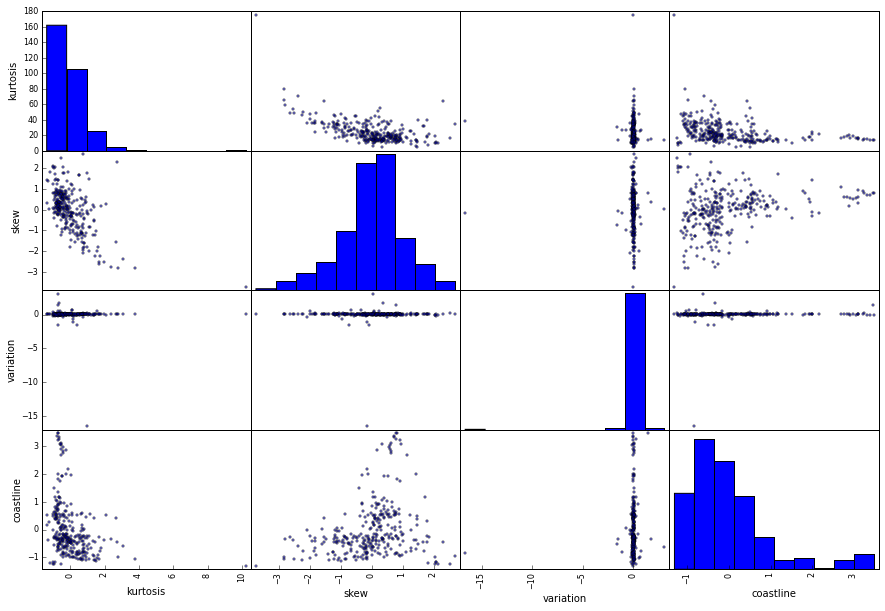

In [4]:
scatter_matrix(df,figsize = (15,10));
#plt.savefig('scattermatrixnonorm.png')

from lightning import Lightning
lgn = Lightning(host='https://radiant-peak-5255.herokuapp.com/', ipython=True)
lgn.create_session('hello world')
import networkx as nx
from numpy import random

G = nx.random_regular_graph(3,100)
mat = nx.adjacency_matrix(G).todense()
l = (random.rand(100)*5).astype('int')

lgn.force(mat, label=l)